In [1]:
import csv
import os
from torch.utils.data import Dataset

class med_data(Dataset):
    def __init__(self,csv_path,mode):
        root_path=os.path.join('../data',mode,'QA')
        csv_file=os.path.join(root_path,csv_path)
        self.mode=mode
        self.csv=csv.reader(open(csv_file))
        data=[]
        for row in self.csv:
            line=''.join(row).split('|')
            if self.mode=='train' or self.mode=='val':
                data.append((line[0],line[1],line[2]))
            else:
                data.append((line[0],line[1]))
        self.datas=data
    def __getitem__(self, index):
        if self.mode=='train' or self.mode=='val':
            image_id,question,answer=self.datas[index]
            data={'image_id':image_id,'question':question,'answer':answer}
        else:
            image_id,question=self.datas[index]
            data={'image_id':image_id,'question':question}
        return data
    def __len__(self):
        return len(self.datas)

In [2]:
train1_data = med_data('Abnormality.csv', 'train')
test1_data = med_data('Abnormality.csv', 'val')
print(len(train1_data))
print(len(test1_data))

3192
500


In [3]:
#获取Abnormality.csv训练集问题列表
train1_quenstions = []
for train_question in train1_data:
    train1_quenstions.append(train_question['question'])
    print(train_question['question'])
    
#获取Abnormality.csv测试集问题列表
test1_quenstions = []
for test_question in test1_data:
    test1_quenstions.append(test_question['question'])
    print(test_question['question'])


what is abnormal in the ct scan?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is most alarming about this x-ray?
what is the primary abnormality in this image?
what is most alarming about this ct scan?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is most alarming about this x-ray?
what is most alarming about this ct scan?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is abnormal in the ct scan?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is most alarming about this mri?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is abnormal in the ct scan?
what abnormality is seen i

what is most alarming about this mri?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is abnormal in the mri?
what abnormality is seen in the image?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is most alarming about this gastrointestinal image?
what is most alarming about this x-ray?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what abnormality is seen in the image?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is most alarming about this ct scan?
what abnormality is seen in the image?
what is abnormal in the mri?
what is the primary abnormality in this image?
what is most alarming about this ultrasound?
what is most alarming about this x-ray?
what is most alarming about this mri?
what is abnormal in the ct scan?
what is the pri

what is the primary abnormality in this image?
what is abnormal in the x-ray?
what is the primary abnormality in this image?
what is abnormal in the mri?
what is most alarming about this mri?
what is the primary abnormality in this image?
what is abnormal in the mri?
what is the primary abnormality in this image?
what is most alarming about this mri?
what is most alarming about this ct scan?
what is most alarming about this ct scan?
what is abnormal in the x-ray?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is most alarming about this mri?
what is most alarming about this nuclear medicine image?
what is abnormal in the mri?
what is abnormal in the ct scan?
what is the primary abnormality in this image?
what is abnormal in the mri?
what is most alarming about this mri?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is abnormal in the ct scan?
w

what is abnormal in the mri?
what is abnormal in the mri?
what is abnormal in the mri?
what is abnormal in the ct scan?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is most alarming about this ct scan?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what is the primary abnormality in this image?
what abnormality is seen in the image?
what abnormality is seen in the image?
what is the primary abnormality in this image?
what abnormality is seen in the image?
is there an abnormality in the ct scan?
what is abnormal in the mri?
what is most alarming about this ct scan?
what is abnormal in the ct scan?
what abnormality is seen in the image?
what abnormality is seen in the image?
what is abnormal in the mri?
what abnormality is seen

In [102]:
#去重
variety1_questions = set(train1_quenstions)
#variety1_test_questions = set(test1_quenstions)

In [122]:
#统计每种问题的数量
count1_train_questions = []
count1_test_questions = []

for question in variety1_questions:
    count1_train_questions.append(train1_quenstions.count(question))
    count1_test_questions.append(test1_quenstions.count(question))
    

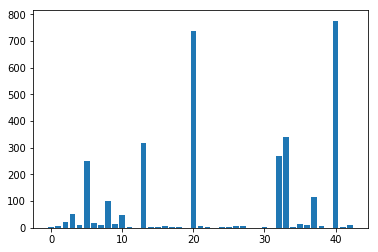

In [116]:
#绘制每种问题出现次数的统计图
import matplotlib.pyplot as plt

plt.bar(range(len(count1_train_questions)), count1_train_questions)
plt.show()

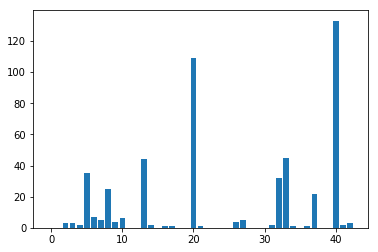

In [123]:
#绘制每种问题出现次数的统计图
import matplotlib.pyplot as plt

plt.bar(range(len(count1_test_questions)), count1_test_questions)
plt.show()

In [186]:
import matplotlib.pyplot as plt

def plt_distribution(train_path, train_mode, test_path, test_mode, data_key):
    
    train_data = med_data(train_path, train_mode)
    test_data = med_data(test_path, test_mode)
    
    #获取训练集问题列表
    train_quenstions = []
    for train_question in train_data:
        train_quenstions.append(train_question[data_key])
        #print(train_question['question'])

    #获取测试集问题列表
    test_quenstions = []
    for test_question in test_data:
        test_quenstions.append(test_question[data_key])
        #print(test_question['question'])
    
    #去重
    variety_questions = set(train_quenstions)
    
    #统计每种问题的数量
    count_train_questions = []
    count_test_questions = []

    for question in variety_questions:
        count_train_questions.append(train_quenstions.count(question))
        count_test_questions.append(test_quenstions.count(question))
    
    plt.figure(16)
    
    plt.subplot(121)
    plt.bar(range(len(count_train_questions)), count_train_questions)
    
    plt.subplot(122)
    plt.bar(range(len(count_test_questions)), count_test_questions)

    plt.show

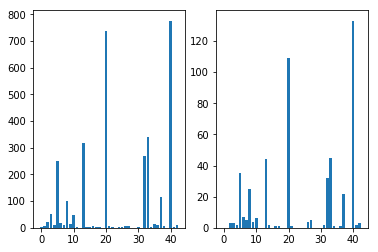

In [187]:
%matplotlib inline

plt_distribution('Abnormality.csv', 'train', 'Abnormality.csv', 'val', 'question')


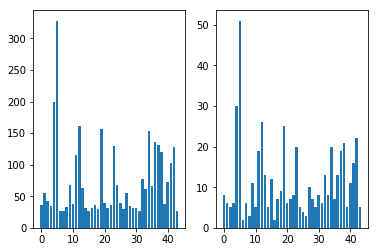

In [188]:
plt_distribution('Modality.csv', 'train', 'Modality.csv', 'val', 'question')

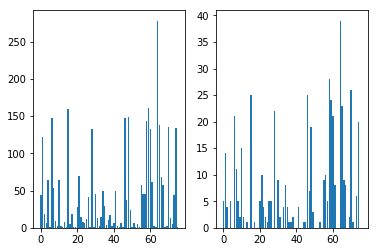

In [189]:
plt_distribution('Organ.csv', 'train', 'Organ.csv', 'val', 'question')

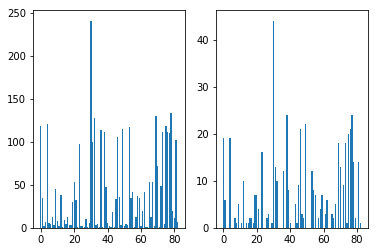

In [190]:
plt_distribution('Plane.csv', 'train', 'Plane.csv', 'val', 'question')

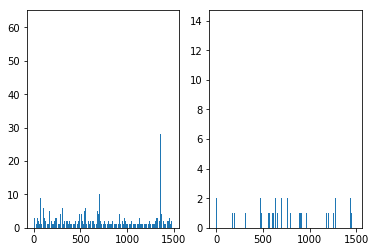

In [191]:
plt_distribution('Abnormality.csv', 'train', 'Abnormality.csv', 'val', 'answer')

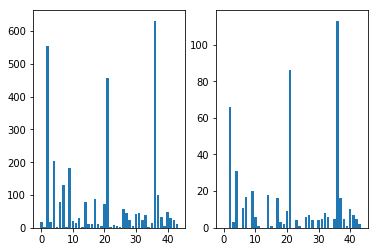

In [192]:
plt_distribution('Modality.csv', 'train', 'Modality.csv', 'val', 'answer')

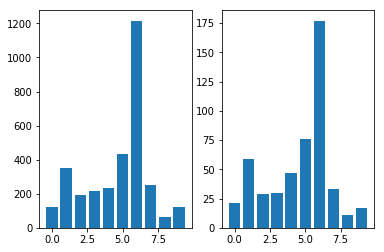

In [193]:
plt_distribution('Organ.csv', 'train', 'Organ.csv', 'val', 'answer')

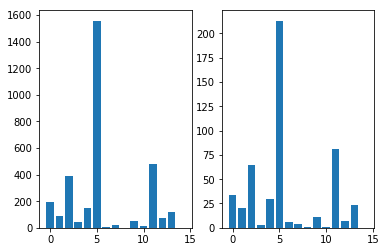

In [194]:
plt_distribution('Plane.csv', 'train', 'Plane.csv', 'val', 'answer')